In [38]:
import yfinance as module_yf
import pandas as module_pd
import numpy as module_np
import tb_custompack as module_tb
import datetime as module_dt
import matplotlib.pyplot as module_plt

In [71]:
# Set specified ticker

# TICKER (yfinance.ticker.Ticker)
# Contains data for corresponding ticker

ticker_symbol = module_yf.Ticker(
    ticker = "AMZN",
)

In [72]:
dict_ticker_info = ticker_symbol.info

In [73]:
dataframe_ticker_data = ticker_symbol.history(
    interval = '1d',
    period = 'max'
).dropna()

int_data_length = len(dataframe_ticker_data)

In [74]:
dataframe_prep_1 = dataframe_ticker_data.reset_index()
dataframe_prep_f = dataframe_prep_1[['Open','High','Low','Close']]

In [75]:
matrix_prep = module_np.array(module_np.log(dataframe_prep_f))

list_ha_data = [matrix_prep[0]]

for int_i in range(0, int_data_length):

    vector_observation = matrix_prep[int_i]

    float_new_close = module_np.mean(
        vector_observation
    )

    float_new_open = module_np.mean(
        list_ha_data[int_i][[0,3]]
    )

    float_new_high = vector_observation[1]

    float_new_low = vector_observation[2]

    list_ha_data.append(
        module_np.array(
            [
                float_new_open,
                float_new_high,
                float_new_low,
                float_new_close
            ]
        )
    )

matrix_ha_data = module_np.array(
    list_ha_data[1:]
)

In [76]:
vector_indicator = matrix_ha_data[:,3] - matrix_ha_data[:,0]
series_indicator = module_pd.Series(vector_indicator)
dataframe_prep_1['Indicator'] = series_indicator
dataframe_ticker_data = dataframe_prep_1.set_index('Date')

In [77]:
def function_mving_ave_series(
    series_main,
    int_length
):

    int_n = len(series_main)

    list_moving_average = [
        module_np.mean(
            a = series_main.iloc[
                max(int_i - int_length, 0) : int_i + 1
            ]
        ) 
        for int_i
        in range(0, int_n)
    ]

    series_moving_average = module_pd.Series(list_moving_average)

    return series_moving_average

In [78]:
# series_indicator = function_mving_ave_series(
#     series_main = dataframe_prep_f['Close'],
#     int_length = 5
# ) - function_mving_ave_series(
#     series_main = dataframe_prep_f['Close'],
#     int_length = 50
# )
# dataframe_prep_1['Indicator'] = series_indicator
# dataframe_ticker_data = dataframe_prep_1.set_index('Date')

In [103]:
datetime_start = module_dt.datetime(2022,1,1)

datetime_end = module_dt.datetime(2022,3,1)

dataframe_selected_data = dataframe_ticker_data.loc[
    datetime_start:datetime_end
].reset_index()

In [104]:
series_capital_1 = module_tb.function_backtester(
    series_prices = dataframe_selected_data['Close'],
    series_indicator = dataframe_selected_data['Indicator'],
    float_ratio = 1
)

In [97]:
series_capital_2 = module_tb.function_backtester(
    series_prices = dataframe_selected_data['Close'],
    series_indicator = -dataframe_selected_data['Indicator'],
    float_ratio = -1
)

In [98]:
def function_diff_series(
    series_main
):

    series_shift = series_main.shift().fillna(
        method = 'backfill'
    )

    series_diff = series_main - series_shift

    return series_diff

In [99]:
series_capital_3 = series_capital_1 * series_capital_2

In [100]:
series_close = dataframe_selected_data['Close']

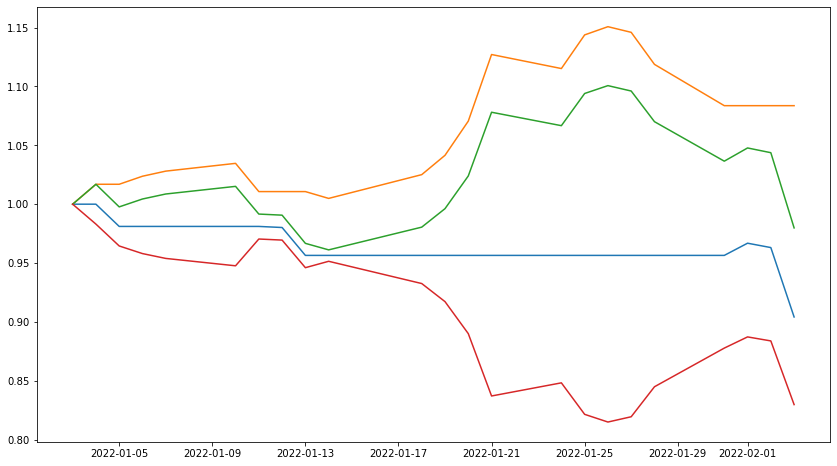

In [101]:
module_plt.figure(0, figsize = (8*(16/9),8))

module_plt.plot(dataframe_selected_data['Date'], module_np.cumprod(series_capital_1))

module_plt.plot(dataframe_selected_data['Date'], module_np.cumprod(series_capital_2))

module_plt.plot(dataframe_selected_data['Date'], module_np.cumprod(series_capital_3))

module_plt.plot(dataframe_selected_data['Date'], series_close / series_close[0])

module_plt.show()

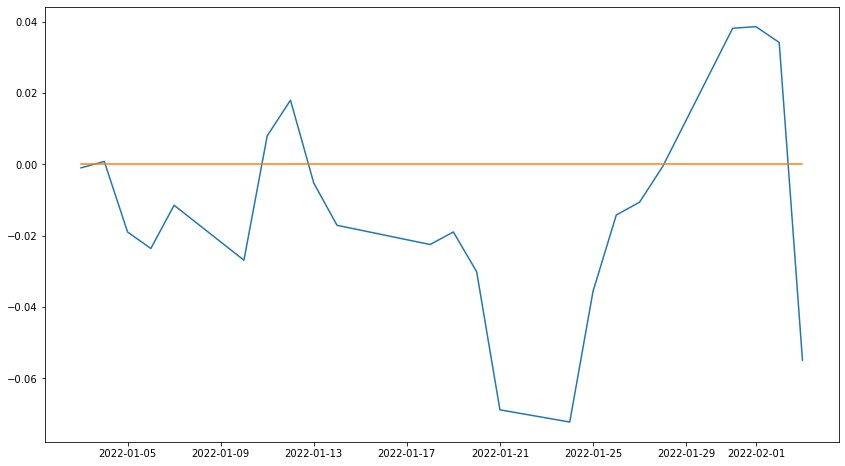

In [102]:
module_plt.figure(0, figsize = (8*(16/9),8))

module_plt.plot(dataframe_selected_data['Date'], dataframe_selected_data['Indicator'])

module_plt.plot(dataframe_selected_data['Date'], 0 * dataframe_selected_data['Indicator'])

module_plt.show()

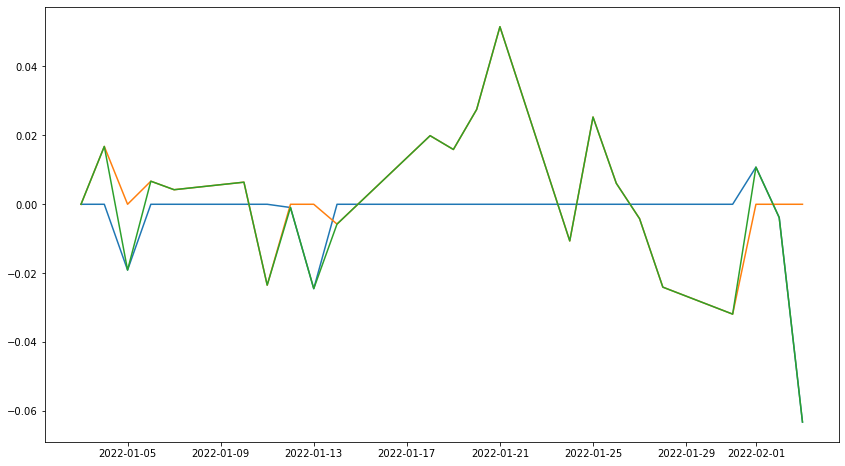

In [106]:
module_plt.figure(0, figsize = (8*(16/9),8))

module_plt.plot(dataframe_selected_data['Date'], module_np.log(series_capital_1))

module_plt.plot(dataframe_selected_data['Date'], module_np.log(series_capital_2))

module_plt.plot(dataframe_selected_data['Date'], module_np.log(series_capital_3))

module_plt.show()